## Reading data

In [9]:
def read_data(filename):

    net={}

    harta = []

    with open(filename, "r") as f:

        nr_noduri = int(f.readline().strip())

        for i in range(0, nr_noduri):

            linie = []

            buffer = f.readline().strip().split(",")
            #print(buffer)

            for el in buffer:
                linie.append(float(el))

            harta.append(linie)

    net['noNodes']=nr_noduri
    net['mat']=harta

    return net

## Warm up

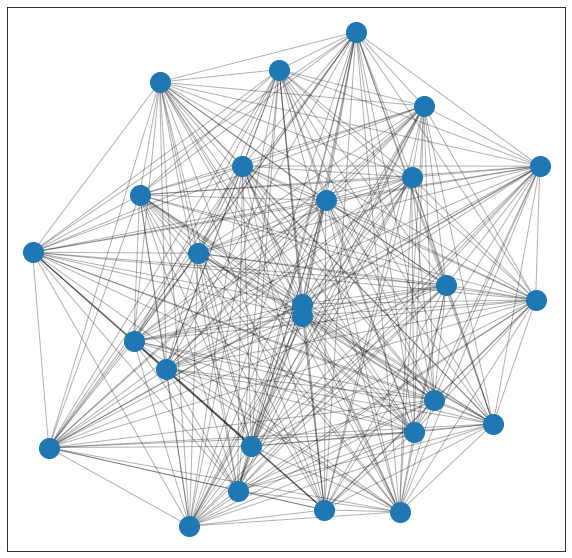

26


In [10]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import warnings 

warnings.simplefilter('ignore')

network=read_data('hard2_tsp.txt')


A=np.matrix(network["mat"])
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(10, 10))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G, pos, node_size=400, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)

print(network['noNodes'])

## Main

In [11]:
from ACO import ACO


ACOParam = {'popSize' : 15,'noGen' :200}

problParam= {'noNodes' : network['noNodes'], 'network' : network['mat'], 'qo' : 0.2, 'alpha':1 , 'beta': 5,'max': 5, 'init': 1.0, 'phi' : 0.2, 'rho' : 0.5, 'r' : 0.2, 'pinver': 0.3, 'shortSize': 10, 'longSize': 5, 'minim': 3 , 'maxim':10, 'dynamic': True, 'change': 0.01, 'maxvalue': 40}

aco= ACO(ACOParam,problParam)

all_time_best=[]
all_time_best_fitness=1000000000000000

allBestFitnesses = []
allAvgFitnesses = []
generations = []

for g in range(ACOParam['noGen']):

    # aco.oneGeneration()
    aco.macoGeneration()
    # bestChromo = aco.best_ant()
    bestChromo=aco.best_ant()

    
    if all_time_best_fitness> bestChromo.fitness:
        all_time_best=bestChromo.repres[:]
        all_time_best_fitness=bestChromo.fitness

    #print(bestChromo)


    # allPotentialSolutionsX = [c.repres for c in aco.population]
    # allPotentialSolutionsY = [c.fitness for c in aco.population]
    # bestSolX = aco.best_ant().repres
    # bestSolY = aco.best_ant().fitness
    
    allPotentialSolutionsX = [c.repres for c in aco.population]
    allPotentialSolutionsY = [c.fitness for c in aco.population]
    bestSolX = aco.best_ant().repres
    bestSolY = aco.best_ant().fitness
    allBestFitnesses.append(bestSolY)
    allAvgFitnesses.append(sum(allPotentialSolutionsY) / len(allPotentialSolutionsY))
    generations.append(g)


## Verdict

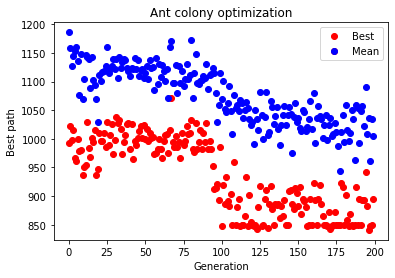

[18, 25, 21, 20, 23, 22, 24, 0, 1, 2, 14, 13, 9, 8, 7, 6, 4, 5, 3, 15, 11, 12, 10, 19, 17, 16]
841.0


In [12]:
plt.ioff()
best, = plt.plot(generations, allBestFitnesses, 'ro', label = 'best')
mean, = plt.plot(generations, allAvgFitnesses, 'bo', label = 'mean')
plt.legend([best, (best, mean)], ['Best', 'Mean'])
plt.xlabel("Generation")
plt.ylabel("Best path")
plt.title("Ant colony optimization")
plt.show()

print(all_time_best)
print(all_time_best_fitness)